In [ ]:
import os
os.environ["_DEBUG"] = "1"
os.environ["_MULTIPROCESS"] = "0"

# Star notation allows importing type hints for kedro variables (catalog, pipeline, etc)
# along with the register_kedro function.
from pasteur.kedro.ipython import *
from pasteur.utils.styles import use_style

# Import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add autoreload to allow iterating on your modules
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

# Register your kedro project to access the catalog
register_kedro()
use_style('mlflow')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO     Kedro project Pasteur Testing Project                                                                          __init__.py:108
INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'                                        __init__.py:109
INFO     Registered line magic 'run_viz'                                                                                __init__.py:115


In [ ]:
m = catalog.load("mimic_tab_admissions.privbayes.model")

In [ ]:
from itertools import combinations

import networkx as nx

from pasteur.graph.hugin import to_moral, find_elim_order, elimination_order_greedy, get_junction_tree, get_message_passing_order
from pasteur.graph.utils import display_induced_graph, display_junction_tree
from pasteur.extras.synth.privbayes import derive_graph_from_nodes

Total cost: 23,616,645


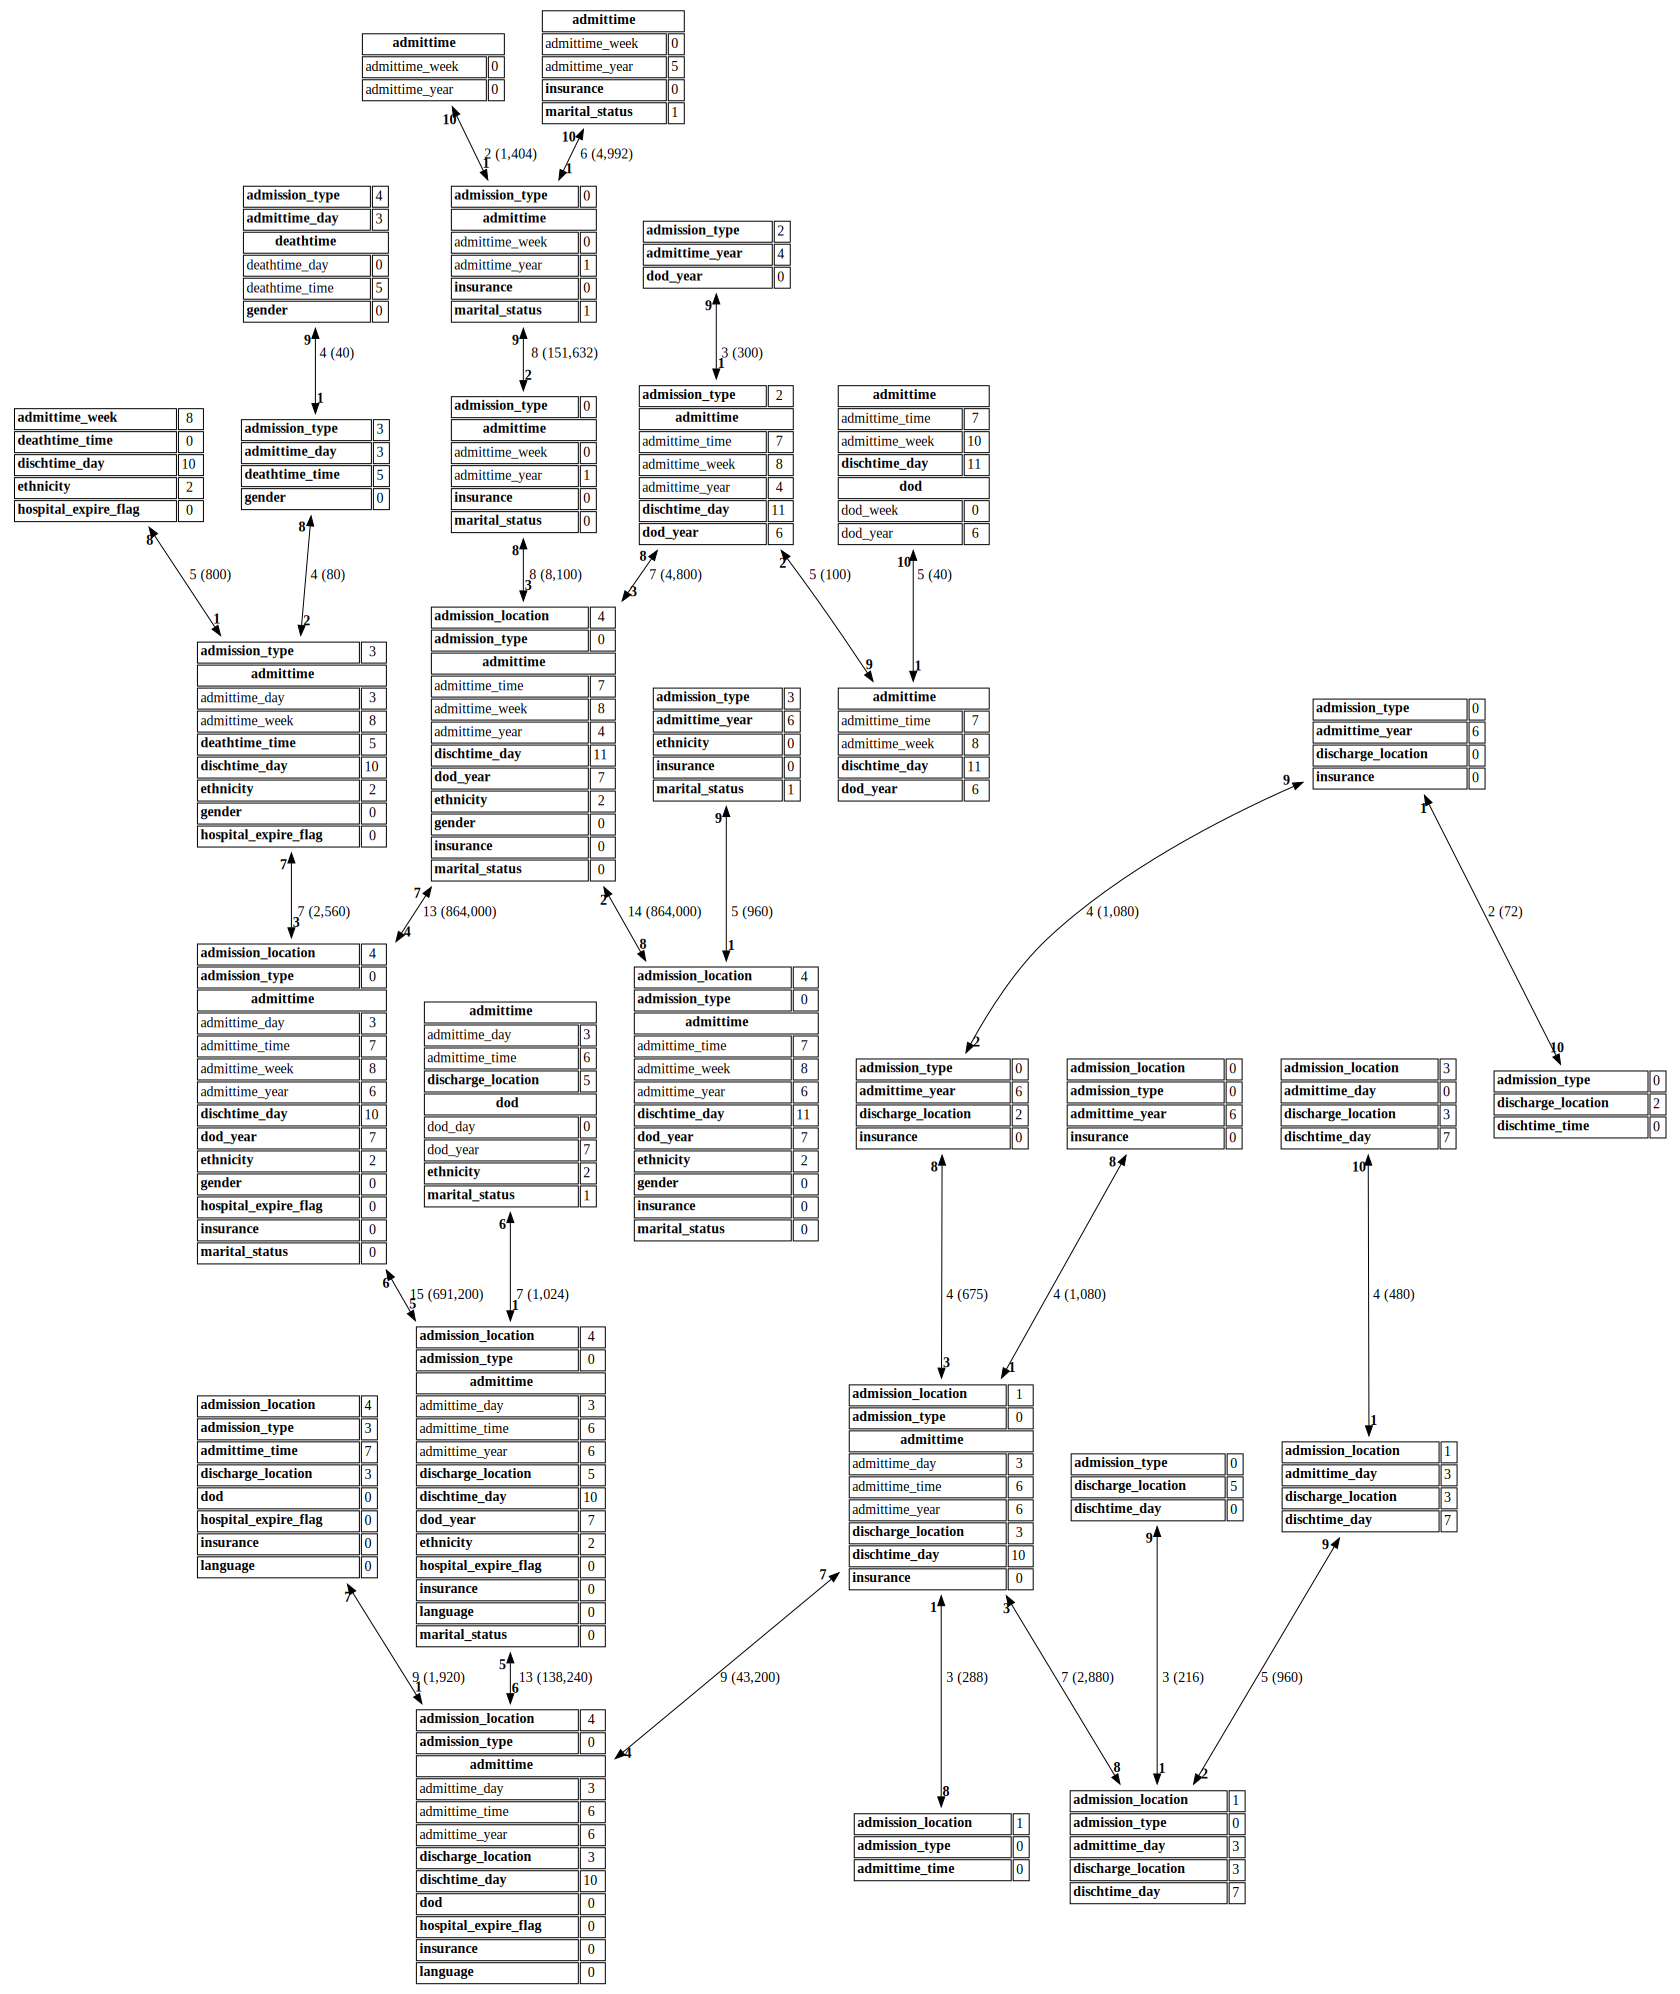

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs)
mg = to_moral(g)
ordering, tri, cost = find_elim_order(mg, m.table_attrs, 30)
junction = get_junction_tree(tri, m.table_attrs)
messages = get_message_passing_order(junction)
print(f"Total cost: {cost:,d}")
display_junction_tree(junction, tri, messages)